#  Import Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import *
from scipy.stats import entropy
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load Data

In [17]:
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']

df_bot=pd.read_csv('/Users/ap1992/Desktop/merge/bots_data.csv',header=None,delim_whitespace=False,names=names,na_values='?')
df_no_bots=pd.read_csv('/Users/ap1992/Desktop/merge/nonbots_data.csv',header=None,delim_whitespace=False,names=names,na_values='?')




# Merge and Clean Data

In [22]:
df = pd.merge(df_bot, df_no_bots, how = 'outer')
decision_data = df.copy()
decision_data.head(5)

#deleting the unnecessary fields
del decision_data['id']
del decision_data ['id_str']
del decision_data['url']
del decision_data['lang']
del decision_data['screen_name']
del decision_data['location']
del decision_data['name']
del decision_data['description']
del decision_data['created_at']
del decision_data['status']

#Convert to Integer values
decision_data['followers_count']=decision_data['followers_count'].astype(int)
decision_data['friends_count']=decision_data['friends_count'].astype(int)
decision_data['favourites_count'] = decision_data['favourites_count'].astype(int)
decision_data['statuses_count'] = decision_data ['statuses_count'].astype(int)
decision_data['verified']=decision_data['verified'].astype(int)
decision_data['default_profile']=decision_data['default_profile'].astype(int)
decision_data['listedcount']=decision_data['listedcount'].astype(int)
decision_data['default_profile_image'] = decision_data['default_profile_image'].astype(int)
decision_data['has_extended_profile'] = decision_data.has_extended_profile.map( lambda x: 1 if x == 'True' else 0)
decision_data['bot']=decision_data['bot'].astype(int)





# Display data

In [23]:
decision_data.head(100)

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,1129,7,2,0,0,23557,0,0,0,1
1,0,22,0,0,0,1,1,1,0,1
2,3,0,3,0,0,1050,1,0,0,1
3,505,13,49,0,0,5109,0,0,0,1
4,15,0,11,0,0,31365,1,0,0,1
5,16,1,4,0,0,1832,0,0,0,1
6,41,394,0,3,0,4,1,0,0,1
7,549,370,12,12,0,4658,0,0,0,1
8,0,60,0,0,0,10,1,0,0,1
9,0,43,4,48,0,86,1,0,0,1


# Split the samples into train/test

In [24]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(decision_data.ix[:,0:9], df['bot'], test_size=0.2, random_state=0)

In [25]:
Xdt_train.head(2)

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile
1733,25253,152,970,1582,1,36172,0,0,0
438,1,337,0,38,0,30,1,0,0


# Decision Tree

In [26]:
tree_clf = DecisionTreeClassifier()

# Classifier Training

In [27]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, ydt_train)


# Performance Evaluation

In [28]:
predicted = clf.predict(Xdt_test)
np.mean(predicted == ydt_test)

0.85011185682326618

In [29]:
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(ydt_test,predicted )))
print("Precision Score: ", (precision_score(ydt_test,predicted,average='micro' )))
print("Recall Score: ", (recall_score(ydt_test,predicted,average='micro' )))
print("F1 Score: ", (f1_score(ydt_test,predicted,average='micro' )))
#print("AUC Score: ", (roc_auc_score(y_test,predicted,average=None )))

('Accuracy Score:', 0.85011185682326618)
('Precision Score: ', 0.85011185682326618)
('Recall Score: ', 0.85011185682326618)
('F1 Score: ', 0.85011185682326618)


# Graphical Representation

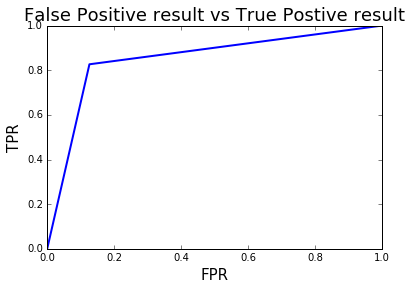

In [31]:
plt.title('False Positive result vs True Postive result', fontsize = 18)
fpr, tpr, thresholds = roc_curve(ydt_test, predicted)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color="blue",label=roc_auc)